In [1]:
import requests
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
print("Modules Imported")

Modules Imported


Question 1. Convolution function:


It accepts an image input, a filter kernel, stride, padding, and the non-linear function. The function must convolve the input image (after padding if specified) with the kernel (at the specified stride size) and generate an output activation after applying the specified non-linearity.
Verify with the standard options for the non-linear activation functions - Sigmoid,tanh, ReLU, Leaky ReLU. Display the input image (e.g. a small image of the IITH logo), the filter kernel, and the output activation map.
Ensure that your function can accept multi-channel input and a corresponding kernel volume.

In [2]:
# Getting IITH LOGO Image form the Internet
URL = "https://www.iitg.ac.in/design/upload/images/Projects/IITH_logo/IIT%20Hyderabad%20Logo_Final%20Design.jpg"
img_data = requests.get(URL).content
with open('logo.jpg', 'wb') as handler:
    handler.write(img_data)

In [3]:
def showImg(image, show_colorbar=False, grayscale=False, title="Image"):
    plt.figure()

    if grayscale:
        plt.imshow(image, cmap='gray')
    else:
        plt.imshow(image)

    if show_colorbar:
        plt.colorbar()

    plt.title(title)
    plt.grid(True)
    plt.show()


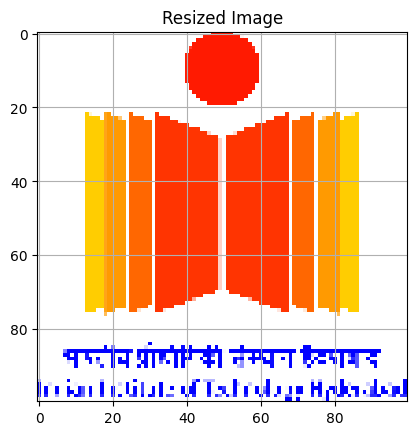

In [4]:
path = r'logo.jpg'
# Reading Image
img = cv2.imread(path)
'''OpenCV reads images in BGR format by default,
 while matplotlib expects RGB format for display.
 Therefore,using cv2.cvtColor to convert the image from BGR to RGB color space.'''
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
''' The image is resized to a new dimensions of 100x100 pixels using cv2.resize.'''
img = cv2.resize(img, (100, 100))
#  Normalizing Image
img = np.divide(img, [255,255,255])
showImg(img,title="Resized Image")


Defining some Non linear Activation functions

In [5]:

def Sigmoid(x):
  return 1/(1 + np.exp(-x))

def Tanh(x):
  return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

def Relu(x):
    z = np.zeros(x.shape)
    f = np.maximum(x, z)
    return f

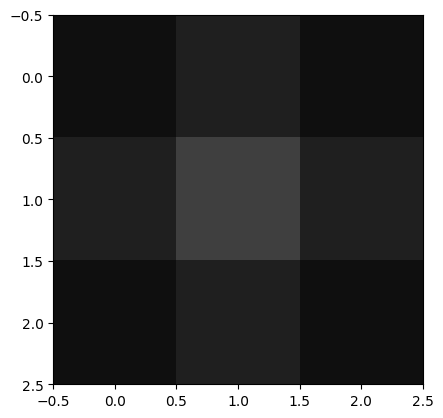

In [6]:
def convolution(img,kernel,padding=0,stride=1,activation="Tanh"):
  output_height = (img.shape[0] + 2*padding - kernel.shape[0]) // stride + 1
  output_width = (img.shape[1] + 2*padding - kernel.shape[0]) // stride + 1
  output = np.zeros((output_height, output_width ))
  image_padded = np.pad(img, ((padding, padding), (padding, padding), (0, 0)), mode='constant')
  for i in range(output_height):
    for j in range(output_width):
        local_region = image_padded[i*stride:i*stride+kernel.shape[0], j*stride:j*stride+kernel_size, :]
        output[i, j] = np.sum(local_region * kernel)
  if activation == 'Sigmoid':
    output = Sigmoid(output)
  if activation =="Tanh":
    output= Tanh(output)
  if activation== 'Relu':
    output=Relu(output)
  return output

plt.imshow(img)
img = img[:,:,:3]
(ih,iw,id) = img.shape[:3]
kernel_size = 3# 3*3 kernel
depth = id
kernel = np.array([[[0.0625,0.0625,0.0625],[0.125,0.125,0.125],[0.0625,0.0625,0.0625]],
                    [[0.125,0.125,0.125],[0.25,0.25,0.25],[0.125,0.125,0.125]],
                    [[0.0625,0.0625,0.0625],[0.125,0.125,0.125],[0.0625,0.0625,0.0625]]])
padding = 0
stride = 1
activation='Sigmoid' #in the previous cell I have defined some more activation functions
output = convolution(img,kernel,padding,stride,activation)
plt.imshow(kernel)


Image Shape[AFTER CONVOLUTION]:  (98, 98)


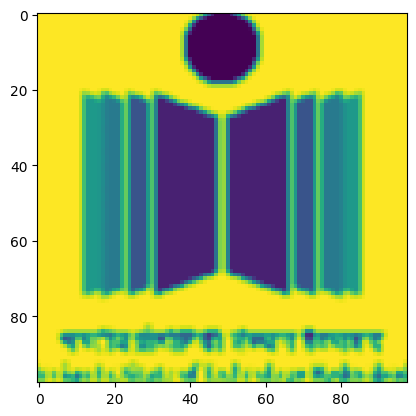

In [7]:
print("Image Shape[AFTER CONVOLUTION]: ",output.shape)
plt.imshow(output)

Image Shape[AFTER CONVOLUTION]:  (98, 98)
output in grayscale


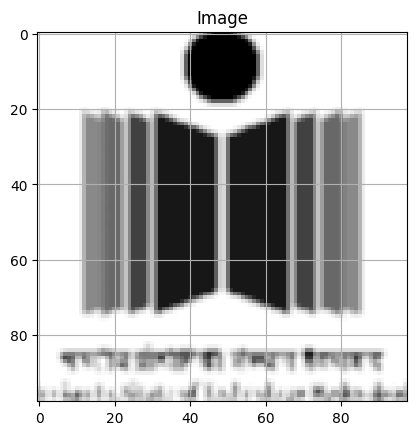

In [8]:
print("Image Shape[AFTER CONVOLUTION]: ",output.shape)
print("output in grayscale")
showImg(output,grayscale = True)

Question 2 : Pooling function:

It accepts as input the activation map output from the convolution function, a pooling function, and stride. The function must output the appropriately pooled activation map. Display the input activation map and the pooled output. (2)

   Input to Polling Function


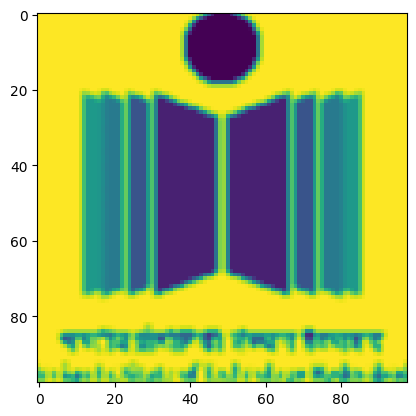

In [9]:
print("   Input to Polling Function")
plt.imshow(output)

Output of max pool 


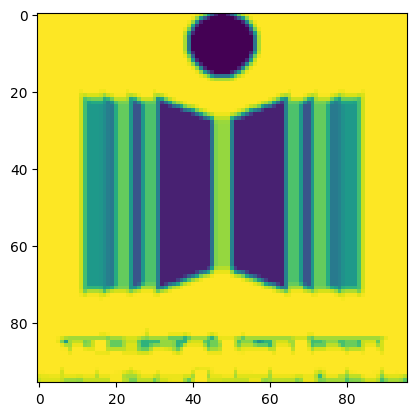

In [10]:

def pooling(output,stride=1):
  pool_height = (output.shape[0] - 3) // stride + 1
  pool_width = (output.shape[1] - 3)  // stride + 1
  output_pool = np.zeros((pool_height,pool_width))
  for i in range(pool_height):
    for j in range(pool_width):
      local_region = output[i*stride:i*stride+3, j*stride:j*stride+3]
      #Applying max_pool
      output_pool[i,j] = np.max(local_region)
  return output_pool
pool_stride = 1
output_pool = pooling(output,pool_stride)
print("Output of max pool ")
plt.imshow(output_pool)

Question 3 . Convolution layer function: It accepts as input a volume (image or activation maps), number
of filters, kernel dimensions, stride, padding, and the non-linear activation function. The function
must convolve the input volume (after padding if specified) with each kernel (at the specified stride
size) and generate an output activation volume after applying the specified non-linearity. Display
the input image or activation maps, the filter kernels, and the output activation maps. Verify that
the output of this function does indeed have the expected size (W × H × C) as discussed in class.

(3, 3, 3, 3) kernel
Original Shape  (100, 100, 3)
Shape after executing convolution layer function first time  (98, 98, 3)
Shape after executing convolution layer function second time  (48, 48, 3)



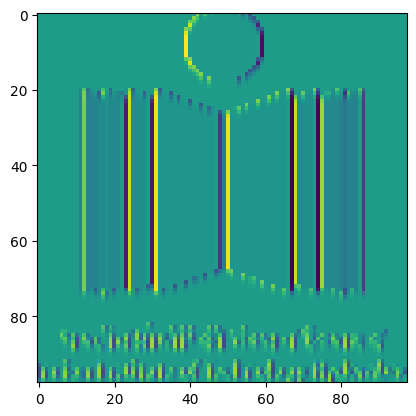

In [11]:
def convolutionLayer(img,kernel,num_filters,kernel_size,stride=1,padding=0,activation="Relu"):
    img_height, img_width, img_depth = img.shape

    output_height = (img_height + 2*padding - kernel_size) // stride + 1
    output_width = (img_width + 2*padding - kernel_size) // stride + 1
    output = np.zeros((output_height, output_width, num_filters))

    for f in range(num_filters):
            for i in range(output_height):
                for j in range(output_width):
                    output[i,j,f] = np.sum(img[i*stride:i*stride+kernel_size, j*stride:j*stride+kernel_size, :]*kernel[:,:,:,f])
                    #output[i, j, f] = np.sum(local_region * kernel[:, :, :, f])
    output = ((output - output.min()) * (1/(output.max() - output.min()) * 1))
    if activation == 'Sigmoid':
      output = Sigmoid(output)
    if activation =="Tanh":
      output= Tanh(output)
    if activation == 'Relu':
      output=Relu(output)
    return output
kernel = np.array([[[[ 0.1,  0.2,  0.3], [ 0.4,  0.5,  0.6], [ 0.7,  0.8,  0.9]],
  [[-0.1, -0.2, -0.3], [-0.4, -0.5, -0.6], [-0.7, -0.8, -0.9]],
  [[ 0.2,  0.4,  0.6], [-0.2, -0.4, -0.6], [ 0.2,  0.4,  0.6]]],

 [[[ 0.3,  0.6,  0.9], [ 1.2,  1.5,  1.8], [ 2.1,  2.4,  2.7]],
  [[-0.3, -0.6, -0.9], [-1.2, -1.5, -1.8], [-2.1, -2.4, -2.7]],
  [[ 0.4,  0.8,  1.2], [-0.4, -0.8, -1.2], [ 0.4,  0.8,  1.2]]],

 [[[ 0.5,  1.0,  1.5], [ 2.0,  2.5,  3.0], [ 3.5,  4.0,  4.5]],
  [[-0.5, -1.0, -1.5], [-2.0, -2.5, -3.0], [-3.5, -4.0, -4.5]],
  [[ 0.6,  1.2,  1.8], [-0.6, -1.2, -1.8], [ 0.6,  1.2,  1.8]]]])
print(kernel.shape,"kernel")
activation= "Sigmoid"
output = convolutionLayer(img,kernel,3,3,1,0,activation)
print("Original Shape ",img.shape)
print("Shape after executing convolution layer function first time ",output.shape)
output2 = convolutionLayer(output,kernel,3,3,2,0)
print("Shape after executing convolution layer function second time ",output2.shape)
print("")
plt.imshow(output[:,:,2])


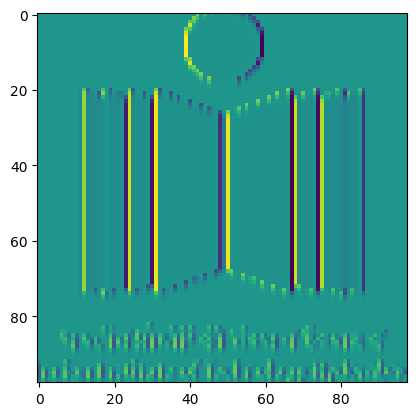

In [12]:
plt.imshow(output[:,:,0])

Question 4 : Pooling layer function:

It accepts as input the activation map volume, the pooling function, stride, and generates a pooled output volume. A special case for performing Global Average Pooling should also be provided.

Global Average Pooling [0.61727342 0.62919018 0.64090283]


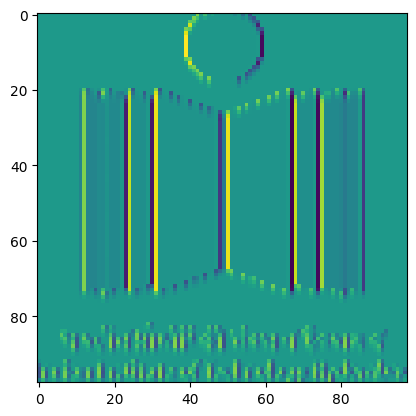

In [13]:
def maxpooling_layer(output,stride,globalAvgPoolFlag):
  pool_height = (output.shape[0] - 3) // stride + 1
  pool_width = (output.shape[1] - 3)  // stride + 1
  depth = output.shape[2]
  output_pool = np.zeros((pool_height,pool_width,depth))
  for f in range(depth):
   output_pool[:,:,f] = pooling(output[:,:,f],stride)
  gat = np.zeros((depth))
  if globalAvgPoolFlag == 1:
    for f in range(depth):
      gat[f] = np.average(output_pool[:,:,f])
  return output_pool,gat

plt.imshow(output[:,:,1])
output_pool,gat = maxpooling_layer(output,3,1) # set the globalAvgPoolFlag to 1 for performing Global Average Pooling
print("Global Average Pooling",gat)

Question 5 : Multilayer Perceptron (MLP) function:

It accepts as input a vector, the number of hidden layers, the size of each hidden layer, the non-linear function, and the size of the output layer. This function should generate an output vector of the specified size. Generate the output with and without the softmax function applied to the output layer. (3)

In [14]:
flat_surface = output_pool.reshape(-1,1)

In [15]:
def mlp(input,output_nodes):
  w1 = np.random.randn(input.shape[0],input.shape[0])
  w2 = np.random.randn(input.shape[0],output_nodes)
  hidden_output = np.matmul(input.T, w1)
  hidden_output = ((hidden_output - hidden_output.min()) * (1/(hidden_output.max() - hidden_output.min()) * 1))
  a1 = hidden_output
  # apply sigmoid activation function to hidden_output
  h1 = 1 / (1 + np.exp(-hidden_output))
  outputs = np.matmul(h1, w2)
  a2 = outputs
  print("Without applying softmax",a2,end = ' ')
  a2 = ((a2 - a2.min()) * (1/(a2.max() - a2.min()) * 1))
  softmax_output = np.float128(np.exp(a2,dtype=np.float128) / np.sum(np.exp(a2),  keepdims=True,dtype=np.float128))
  h2 = softmax_output
  print("\n")
  print("\n After applying softmax", h2,end = ' ')
  print("\n Answer label",np.argmax(h2),end = ' ')
  return h2

h = mlp(flat_surface,10)

Without applying softmax [[ 28.14090762 -60.46637495 -20.44803011  47.62689571  39.7701661
  -16.04251123 -41.88215975  60.65541808 -12.74570112 -10.33979003]] 


 After applying softmax [[0.11861593 0.05707325 0.07941864 0.13931953 0.13056924 0.08236048
  0.06653776 0.15514118 0.08463304 0.08633096]] 
 Answer label 7 

Without applying softmax: [[1.         0.16010347 0.28916954 0.61632775 0.62793056 0.
  0.5091353  0.13987954 0.60389114 0.03883336]]

After applying softmax: [[0.17384896 0.07506019 0.08540088 0.1184528  0.11983519 0.06395546
  0.1064124  0.07355743 0.11698877 0.06648792]]
Answer label: 0


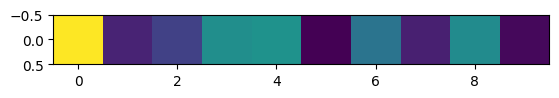

In [16]:

def mlp2(input, output_nodes, activation='sigmoid', num_hidden_layers=1, num_neurons_hidden_layer=10):
    input_size = input.shape[0]
    w1 = np.random.randn(input_size, num_neurons_hidden_layer)
    w_hidden_layers = [w1]

    for _ in range(num_hidden_layers - 1):
        w_hidden_layers.append(np.random.randn(num_neurons_hidden_layer, num_neurons_hidden_layer))

    w_output = np.random.randn(num_neurons_hidden_layer, output_nodes)

    hidden_outputs = [input.T.dot(w1)]
    hidden_outputs[0] = ((hidden_outputs[0] - hidden_outputs[0].min()) * (1/(hidden_outputs[0].max() - hidden_outputs[0].min()) * 1))

    if activation == 'sigmoid':
        hidden_outputs[0] = 1 / (1 + np.exp(-hidden_outputs[0]))
    elif activation == 'relu':
        hidden_outputs[0] = np.maximum(0, hidden_outputs[0])
    else:
        raise ValueError("Unsupported activation function. Choose 'sigmoid' or 'relu'.")

    for i in range(1, num_hidden_layers):
        hidden_outputs.append(np.matmul(hidden_outputs[i - 1], w_hidden_layers[i]))
        hidden_outputs[i] = ((hidden_outputs[i] - hidden_outputs[i].min()) * (1/(hidden_outputs[i].max() - hidden_outputs[i].min()) * 1))
        if activation == 'sigmoid':
            hidden_outputs[i] = Sigmoid(hidden_outputs[i])
        elif activation == 'Relu':
            hidden_outputs[i] = np.maximum(0, hidden_outputs[i])

    outputs = np.matmul(hidden_outputs[-1], w_output)
    outputs = ((outputs - outputs.min()) * (1/(outputs.max() - outputs.min()) * 1))
    softmax_output = np.exp(outputs) / np.sum(np.exp(outputs),  keepdims=True)

    print("Without applying softmax:", outputs)
    print("\nAfter applying softmax:", softmax_output)
    print("Answer label:", np.argmax(softmax_output))

    return softmax_output

output_nodes = 10  # Example number of output nodes
np.random.seed(100)

h = mlp2(flat_surface, output_nodes, activation='sigmoid', num_hidden_layers=1, num_neurons_hidden_layer=2)
plt.imshow(h)

Question 6 :

 Putting-it all together:

 Finally, use the functions you have written to implement a CNN with the following architecture. The CNN must accept an image input and output a vector of appropriate dimension. In other words, the function must effectively implement the feed-forward path in a CNN. (5)


• Input image of size 224×224×3. Use validation images (or, random crops) from the ILSVRC dataset.


• Convolution layer with 16 kernels of size 5 × 5 spatial dimensions and ReLU activation.

• Max pooling layer of size 2 × 2 with a stride of 2 along each dimension. • Convolution layer with 32 kernels of spatial size 3 × 3 and sigmoid activation.

• Max pooling layer of size 2 × 2 with a stride of 2 along each dimension.

 • A Global Average Pooling (GAP) layer.

 • An MLP with one hidden layer (size same as input) that accepts as input the previous layer’s output and maps it to 1000 output nodes.

 Use ReLU activation for the MLP (softmax in the o/p layer). Verify that your composition of function accepts and image input and outputs a vector.

In [17]:
!git clone https://github.com/ndb796/Small-ImageNet-Validation-Dataset-1000-Classes
%cd Small-ImageNet-Validation-Dataset-100-Classes

Cloning into 'Small-ImageNet-Validation-Dataset-1000-Classes'...
remote: Enumerating objects: 6022, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6022 (delta 1), reused 0 (delta 0), pack-reused 6016
Receiving objects: 100% (6022/6022), 624.87 MiB | 22.81 MiB/s, done.
Resolving deltas: 100% (2/2), done.
Updating files: 100% (5005/5005), done.
[Errno 2] No such file or directory: 'Small-ImageNet-Validation-Dataset-100-Classes'
/content


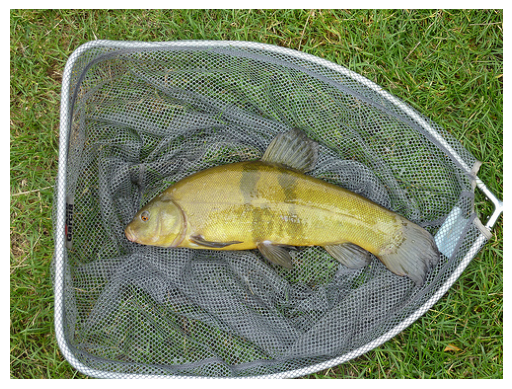

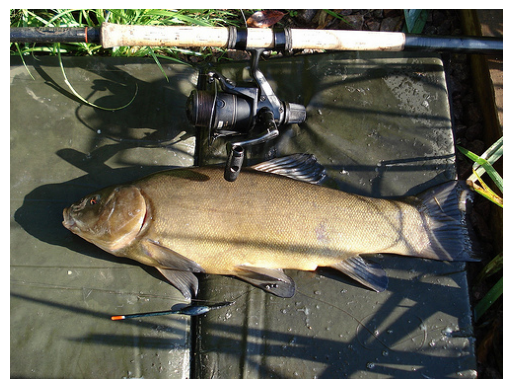

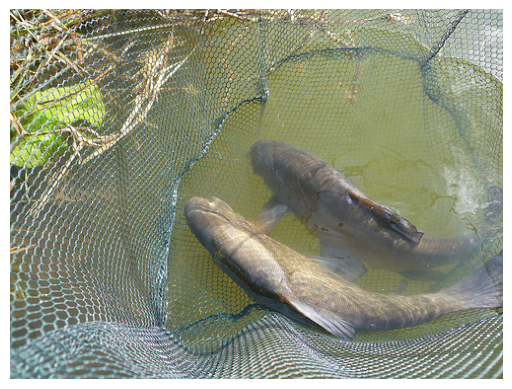

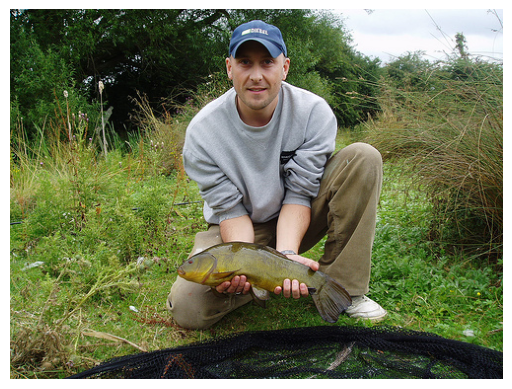

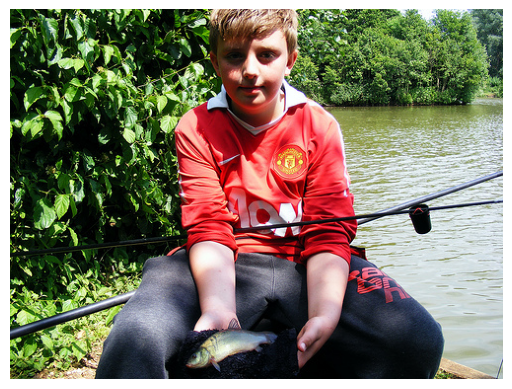

In [18]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Set the path to the directory containing the images
directory = "/content/Small-ImageNet-Validation-Dataset-1000-Classes/ILSVRC2012_img_val_subset/0"

files = os.listdir(directory)

# Filter out non-image files
image_files = [file for file in files if file.endswith(('.JPEG', '.jpeg', '.png', '.bmp', '.gif'))]

# Check if there are any image files
if not image_files:
    print("No image files found in the directory.")
else:
    # Display the first few images
    num_images_to_display = min(5, len(image_files))
    for i in range(num_images_to_display):
        file = image_files[i]
        image_path = os.path.join(directory, file)

        # Load and display the image
        image = Image.open(image_path)
        plt.imshow(image)
        plt.axis('off')
        plt.show()

Original Image Size: (500, 375)
Resized Image Size: (224, 224)


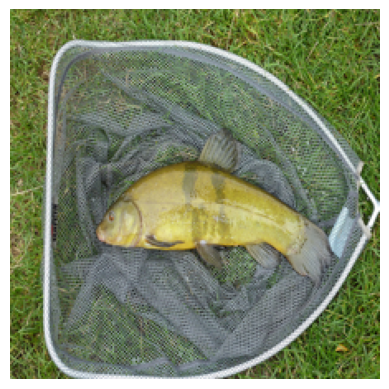

Original Image Size: (500, 375)
Resized Image Size: (224, 224)


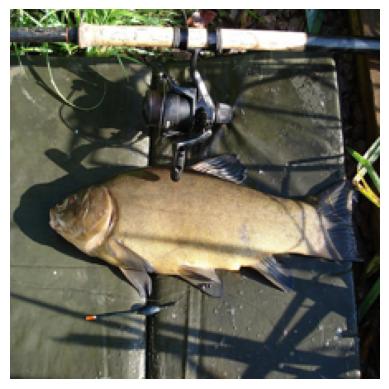

Original Image Size: (500, 375)
Resized Image Size: (224, 224)


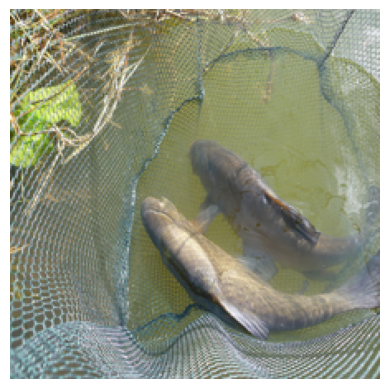

Original Image Size: (500, 375)
Resized Image Size: (224, 224)


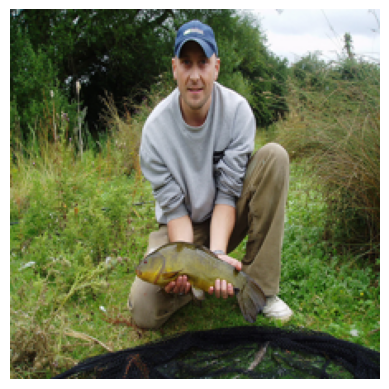

Original Image Size: (500, 375)
Resized Image Size: (224, 224)


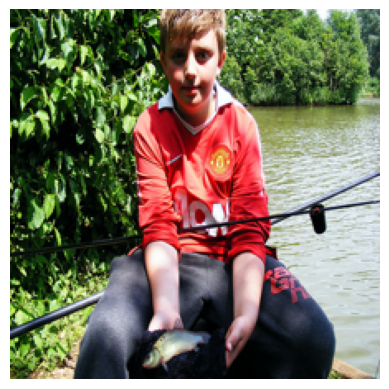

In [19]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Set the path to the directory containing the images
directory = "/content/Small-ImageNet-Validation-Dataset-1000-Classes/ILSVRC2012_img_val_subset/0"

files = os.listdir(directory)

# Filter out non-image files
image_files = [file for file in files if file.endswith(('.JPEG', '.jpeg', '.png', '.bmp', '.gif'))]

# Check if there are any image files
if not image_files:
    print("No image files found in the directory.")
else:
    # Display the first few images
    num_images_to_display = min(5, len(image_files))
    for i in range(num_images_to_display):
        file = image_files[i]
        image_path = os.path.join(directory, file)

        # Load the image
        image = Image.open(image_path)

        # Print the original size
        print("Original Image Size:", image.size)

        # Resize the image to 224x224
        resized_image = image.resize((224, 224))

        # Convert to RGB if image mode is not RGB
        if resized_image.mode != 'RGB':
            resized_image = resized_image.convert('RGB')

        # Print the resized image size
        print("Resized Image Size:", resized_image.size)

        # Display the resized image
        plt.imshow(resized_image)
        plt.axis('off')
        plt.show()


In [20]:
resized_image.size

(224, 224)

In [21]:
resized_image=np.array(resized_image)

In [22]:
resized_image.shape

(224, 224, 3)

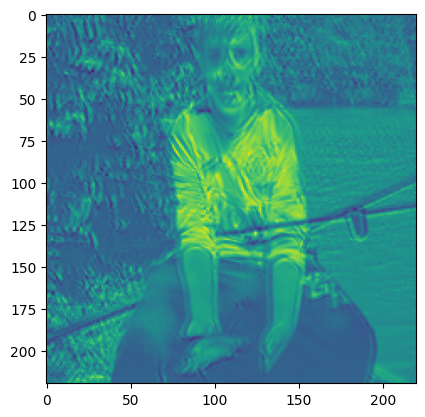

In [23]:
kernel = np.random.randn(5,5,3,16)
activation='Relu'
first = convolutionLayer(resized_image,kernel,16,5,stride=1,padding=0,activation='Relu')
plt.imshow(first[:,:,0])

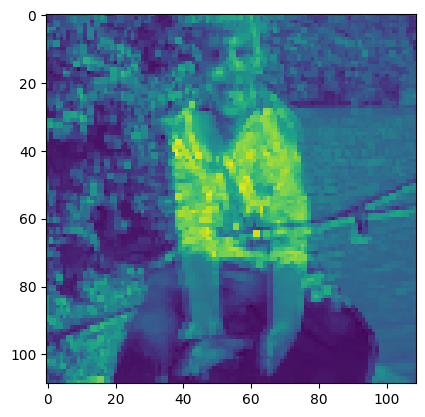

In [24]:
first_pool,gat  = maxpooling_layer(first,2,0)
plt.imshow(first_pool[:,:,0])

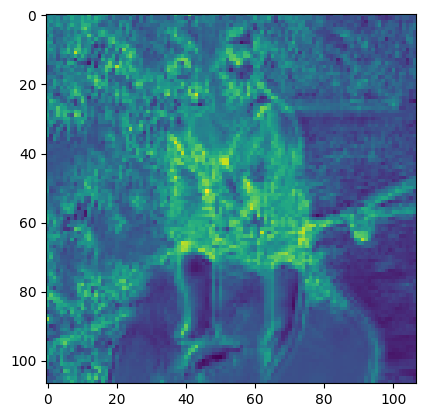

In [25]:
kernel = np.random.randn(3, 3, 16, 32)
second = convolutionLayer(first_pool,kernel,32,3,stride=1,padding=0,activation='Sigmoid')
plt.imshow(second[:,:,0])

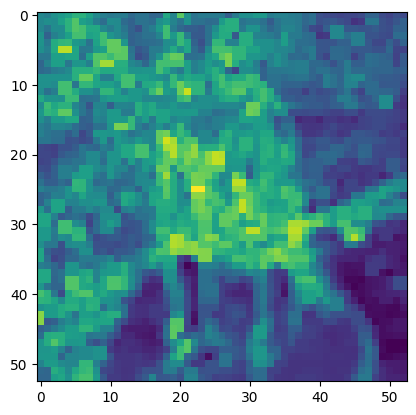

In [26]:
second_pool,gat = maxpooling_layer(second,2,0) # gat flag is zero here
plt.imshow(second_pool[:,:,0])

A Global Average Pooling (GAP) layer.

(32,)

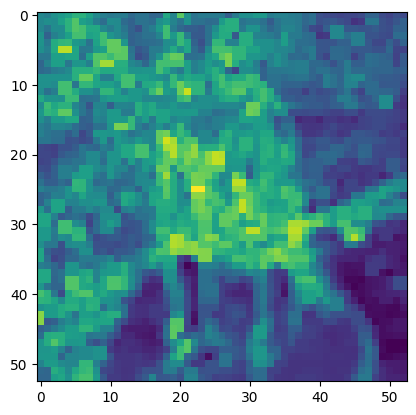

In [27]:
second_pool,gat = maxpooling_layer(second,2,1) # gat flag is 1 here
plt.imshow(second_pool[:,:,0])
gat.shape

An MLP with one hidden layer (size same as input) that accepts as input the previous layer’s
output and maps it to 1000 output nodes. Use ReLU activation for the MLP (softmax in the
o/p layer).

In [28]:
mlp_6 =  mlp2(gat, 1000, activation='relu', num_hidden_layers=1, num_neurons_hidden_layer=32)
print("Shape ",mlp_6.shape)

Without applying softmax: [0.44399702 0.38102017 0.3853459  0.53332586 0.39326086 0.39761109
 0.34446751 0.28663219 0.56078602 0.62774923 0.76106066 0.44441635
 0.38804963 0.86144731 0.45064678 0.57332759 0.73778013 0.43146035
 0.36155046 0.82342596 0.52130609 0.41810022 0.15301164 0.58700755
 0.51695772 0.41684518 0.23963831 0.36575571 0.61041057 0.33277028
 0.64950047 0.2839242  0.59786763 0.32691496 0.53102069 0.93493689
 0.667594   0.21577398 0.45889475 0.15429556 0.79230073 0.80522775
 0.31875436 0.57662453 0.66691094 0.6934174  0.64348089 0.61689317
 0.45388745 0.60607805 0.57894037 0.53128942 0.43811294 0.46789033
 0.46132532 0.47497233 0.71449623 0.63961731 0.43920094 0.40939218
 0.6497791  0.58347204 0.48912772 0.58278512 0.54916381 0.53999529
 0.43860146 0.70570409 0.40118185 0.41114765 0.43227817 0.21835823
 0.45705273 0.31507042 0.29054165 0.54626698 0.31338831 0.75007684
 0.40491409 0.53335828 0.84318002 0.51728658 0.2915962  0.94240457
 0.4315486  0.62271092 0.48703164 0.

The adding problem: In this task, each data sample consists of a sequence of variable length,

but a constant depth (size of feature vector at each time instance) of 2. All values of the first di-
mension (randomly) lie in [0, 1], and the second dimension is all zeros except for two elements that

are marked by 1. The objective of the task is to sum the random values whose second dimensions
are marked by 1. Train the different RNNs (Elmon network, LSTM, and GRU) discussed in the
class and compare their performance against a baseline that always predicts a sum of 1 plotting
the learning curves and final performance. Note that you are expected to implement these models
(as opposed to using the built-in constructs).[3 (Elmon) + 7 (LSTM) + 4 (GRU)+ 6 (Dataset &
baseline & comparison) = 20]
The following table presents two data samples (x) along with their labels (y). Note that the
samples should be of different lengths (n), so the dimensions of each sample can be represented as
n × 2. Given examples have lengths of 5 and 8 respectively. You have to generate/create a big
dataset (≥ 5000) of such samples for training and testing of the RNNs.
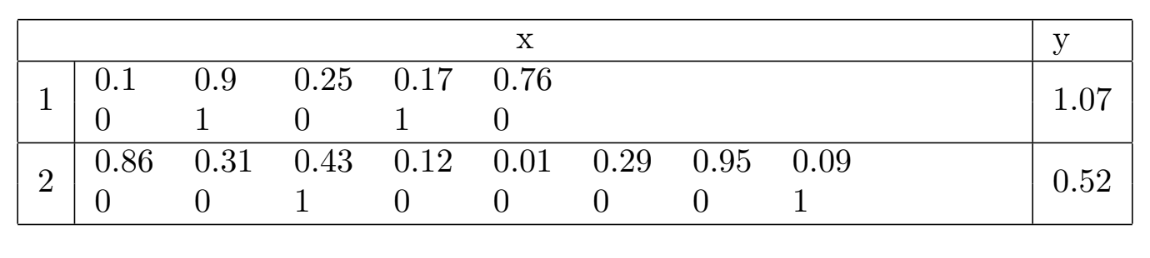

In [34]:
import torch
from torch.nn.utils.rnn import pad_sequence

In [35]:
input_size = 2
output_size = 1
hidden_state = 16

w_xh = torch.randn(input_size, hidden_state,requires_grad = True)
w_hh = torch.randn(hidden_state, hidden_state,requires_grad = True)
w_hy = torch.randn(hidden_state, output_size,requires_grad = True)

b_h = torch.zeros(hidden_state,requires_grad = True)
b_p = torch.zeros(output_size,requires_grad = True)

lr = 0.01
total_loss = 0
optimizer = torch.optim.Adam([w_xh, w_hh, w_hy, b_h, b_p], lr=lr)
num_epoch = 100
data_samples = 5000
max_len = 10

In [36]:
def generateData():
 data = np.zeros((data_samples, 10, 2))
 labels = np.zeros((data_samples))
 for i in range(data_samples):
        length = np.random.randint(5, 10)
        sample = np.zeros((length, 2))
        sample[:, 0] = np.random.rand(length)
        idx = np.random.choice(length, 2, replace=False)
        sample[idx, 1] = 1
        data[i, :length, :] = sample
        labels[i] = sample[idx, 0].sum()
 return data, labels

def tanh(x):
    return torch.tanh(x)

def mse_loss(pred,actual):
  return torch.mean((pred - actual) ** 2)


In [37]:
x1,y1 = generateData()
x_train = x1[:3000]
x_test = x1[3000:]
y_train = y1[:3000]
y_test = y1[3000:]
elom_losses = np.zeros((num_epoch))
baseline_loss = np.zeros((num_epoch))
for iteration in range(num_epoch):
    total_loss = 0
    h = torch.zeros(hidden_state)
    y = torch.tensor(y_train).float()
    x = torch.tensor(x_train).float()
    for t in range(max_len):
      h = tanh(torch.matmul(x[:,t,:], w_xh) + torch.matmul(h, w_hh)+b_h)
      y_pred = torch.matmul(h, w_hy)+b_p

    loss = mse_loss(y_pred,y)
    baselineloss = mse_loss(1,y)
    elom_losses[iteration] = loss
    baseline_loss[iteration] = baselineloss
    total_loss += loss
    optimizer.zero_grad()
    loss.backward(retain_graph = True)
    optimizer.step()

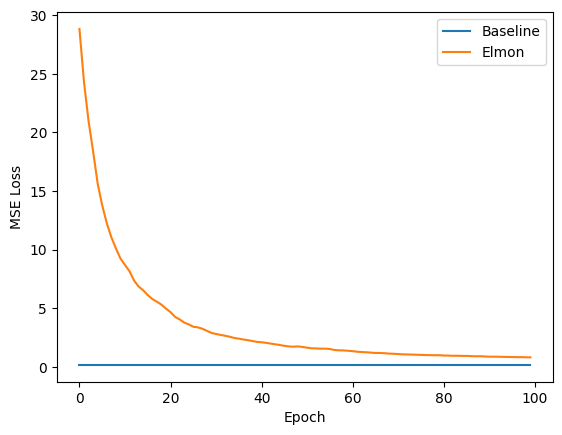

In [38]:

#plottng the learning curve
plt.plot(range(num_epoch), baseline_loss, label='Baseline')
plt.plot(range(num_epoch), elom_losses, label='Elmon')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.show()

In [39]:
#Now comparing the mse for the test data
h = torch.zeros(hidden_state)
y = torch.tensor(y_test).float()
x = torch.tensor(x_test).float()
for t in range(max_len):
      h = tanh(torch.matmul(x[:,t,:], w_xh) + torch.matmul(h, w_hh)+b_h)
      y_pred = torch.matmul(h, w_hy)+b_p


In [40]:
loss = mse_loss(y_pred,y)
baselineloss = mse_loss(1,y)
print(f"Elmon loss = {loss}")
print(f"baselineloss = {baselineloss}")

Elmon loss = 1.1611770391464233
baselineloss = 0.16712287068367004


In [41]:
num_epochs = 100
num_samples = 5000
lstm_loss = np.zeros((num_epochs))
baseline_loss = np.zeros((num_epochs))
W_ii = torch.randn(input_size, hidden_state,requires_grad = True)
W_hi = torch.randn(hidden_state, hidden_state,requires_grad = True)
W_if = torch.randn(input_size, hidden_state,requires_grad = True)
W_hf = torch.randn(hidden_state, hidden_state,requires_grad = True)
W_ig = torch.randn(input_size, hidden_state,requires_grad = True)
W_hg = torch.randn(hidden_state, hidden_state,requires_grad = True)
W_io = torch.randn(input_size, hidden_state,requires_grad = True)
W_ho = torch.randn(hidden_state, hidden_state,requires_grad = True)
W_ph = torch.randn(hidden_state, output_size,requires_grad = True)

# Initialize biases
b_ii = torch.zeros(hidden_state,requires_grad = True)
b_hi = torch.zeros(hidden_state,requires_grad = True)
b_if = torch.zeros(hidden_state,requires_grad = True)
b_hf = torch.zeros(hidden_state,requires_grad = True)
b_ig = torch.zeros(hidden_state,requires_grad = True)
b_hg = torch.zeros(hidden_state,requires_grad = True)
b_io = torch.zeros(hidden_state,requires_grad = True)
b_ho = torch.zeros(hidden_state,requires_grad = True)
b_p = torch.zeros(output_size,requires_grad = True)


In [42]:
# Define activation function
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))


# Define optimizer
lr = 0.01
params = [W_ii, W_hi, W_if, W_hf, W_ig, W_hg, W_io, W_ho, W_ph, b_ii, b_hi, b_if, b_hf, b_ig, b_hg, b_io, b_ho, b_p]
optimizer2 = torch.optim.Adam(params, lr=lr)


In [43]:
x1,y1 = generateData()
x_train = x1[:3000]
x_test = x1[3000:]
y_train = y1[:3000]
y_test = y1[3000:]

for epoch in range(num_epochs):
        x = torch.tensor(x_train).float().unsqueeze(0)
        y = torch.tensor(y_train).float().unsqueeze(0)

        # Initialize hidden state and cell state
        h = torch.zeros(1, hidden_state)
        c = torch.zeros(1, hidden_state)

        # Forward pass
        for t in range(max_len):
            i_t = sigmoid(torch.matmul(x[:, t, :], W_ii) + torch.matmul(h, W_hi) + b_ii + b_hi)
            f_t = sigmoid(torch.matmul(x[:, t, :], W_if) + torch.matmul(h, W_hf) + b_if + b_hf)
            g_t = tanh(torch.matmul(x[:, t, :], W_ig) + torch.matmul(h, W_hg) + b_ig + b_hg)
            o_t = sigmoid(torch.matmul(x[:, t, :], W_io) + torch.matmul(h, W_ho) + b_io + b_ho)
            c = f_t * c + i_t * g_t
            h = o_t * tanh(c)
            y_pred = torch.matmul(h, W_ph) + b_p
        loss = mse_loss(y_pred,y)
        lstm_loss[epoch] = loss
        baselineloss = mse_loss(1,y)
        baseline_loss[epoch] = baselineloss
        optimizer2.zero_grad()
        loss.backward(retain_graph = True)
        optimizer2.step()



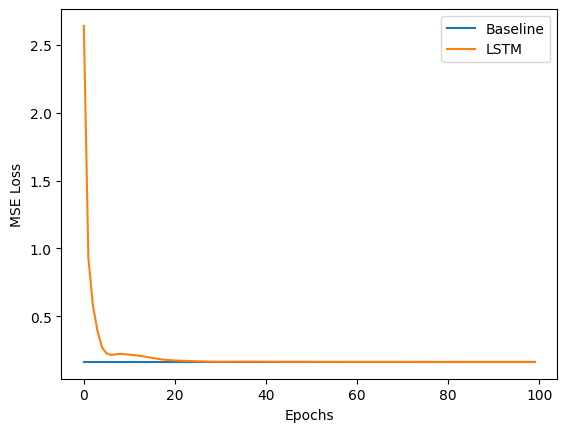

In [44]:
#plottng the learning curve
plt.plot(range(num_epoch), baseline_loss, label='Baseline')
plt.plot(range(num_epoch), lstm_loss, label='LSTM')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.show()


In [45]:
#Now comparing the mse for the test data
h = torch.zeros(hidden_state)
y = torch.tensor(y_test).float()
x = torch.tensor(x_test).float()
print(x.shape)
print(y.shape)
h = torch.zeros(1, hidden_state)
c = torch.zeros(1, hidden_state)
for t in range(max_len):
            i_t = sigmoid(torch.matmul(x[:, t, :], W_ii) + torch.matmul(h, W_hi) + b_ii + b_hi)
            f_t = sigmoid(torch.matmul(x[:, t, :], W_if) + torch.matmul(h, W_hf) + b_if + b_hf)
            g_t = tanh(torch.matmul(x[:, t, :], W_ig) + torch.matmul(h, W_hg) + b_ig + b_hg)
            o_t = sigmoid(torch.matmul(x[:, t, :], W_io) + torch.matmul(h, W_ho) + b_io + b_ho)
            c = f_t * c + i_t * g_t
            h = o_t * tanh(c)
            y_pred = torch.matmul(h, W_ph) + b_p
loss = mse_loss(y_pred,y)
baselineloss = mse_loss(1,y)
print(f"LSTM loss = {loss}")
print(f"baselineloss = {baselineloss}")


torch.Size([2000, 10, 2])
torch.Size([2000])
LSTM loss = 0.417413592338562
baselineloss = 0.17581099271774292


In [46]:
# Initialize weights
hidden_size = 16
gru_loss = np.zeros((num_epochs))
baseline_loss = np.zeros((num_epochs))
W_zx = torch.randn(input_size, hidden_size,requires_grad = True)
W_zh = torch.randn(hidden_size, hidden_size,requires_grad = True)
W_rx = torch.randn(input_size, hidden_size,requires_grad = True)
W_rh = torch.randn(hidden_size, hidden_size,requires_grad = True)
W_hx = torch.randn(input_size, hidden_size,requires_grad = True)
W_hh = torch.randn(hidden_size, hidden_size,requires_grad = True)
W_ph = torch.randn(hidden_size, output_size,requires_grad = True)

# Initialize biases
b_z = torch.zeros(hidden_size,requires_grad = True)
b_r = torch.zeros(hidden_size,requires_grad = True)
b_h = torch.zeros(hidden_size,requires_grad = True)
b_p = torch.zeros(output_size,requires_grad = True)

In [47]:

# Define optimizer
lr = 0.01
optimizer = torch.optim.Adam([W_zx, W_zh, W_rx, W_rh, W_hx, W_hh, W_ph, b_z, b_r, b_h, b_p], lr=lr)

# Train model
num_epochs = 100
num_samples = 5000
x1,y1 = generateData()
x_train = x1[:3000]
x_test = x1[3000:]
y_train = y1[:3000]
y_test = y1[3000:]

In [48]:
for epoch in range(num_epochs):
    x = torch.tensor(x_train).float().unsqueeze(0)
    y = torch.tensor(y_train).float().unsqueeze(0)
    h = torch.zeros(1, hidden_size)
    for t in range(max_len):
        z = sigmoid(torch.matmul(x[:, t, :], W_zx) + torch.matmul(h, W_zh) + b_z)
        r = sigmoid(torch.matmul(x[:, t, :], W_rx) + torch.matmul(h, W_rh) + b_r)
        g = tanh(torch.matmul(x[:, t, :], W_hx) + torch.matmul(r*h, W_hh) + b_h)
        h = (1 - z) * h + z * g
        y_pred = torch.matmul(h, W_ph) + b_p


    loss = mse_loss(y_pred, y)
    gru_loss[epoch] = loss
    baselineloss = mse_loss(1,y)
    baseline_loss[epoch] = baselineloss
    total_loss += loss.item()
    optimizer.zero_grad()
    loss.backward(retain_graph=True)
    optimizer.step()

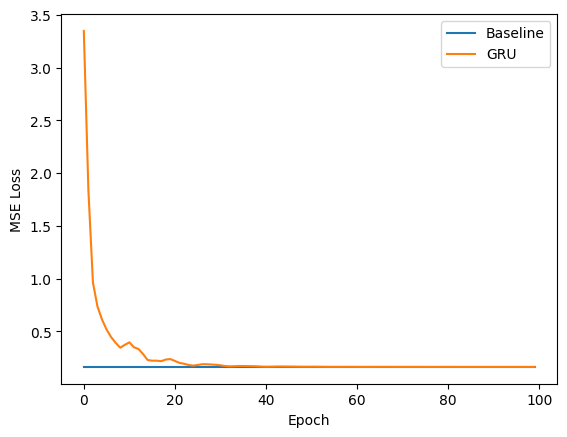

In [49]:

#plottng the learning curve
plt.plot(range(num_epoch), baseline_loss, label='Baseline')
plt.plot(range(num_epoch), gru_loss, label='GRU')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.show()

In [50]:
#Now comparing the mse for the test data
h = torch.zeros(hidden_state)
y = torch.tensor(y_test).float()
x = torch.tensor(x_test).float()
h = torch.zeros(1, hidden_state)
for t in range(max_len):
        z = sigmoid(torch.matmul(x[:, t, :], W_zx) + torch.matmul(h, W_zh) + b_z)
        r = sigmoid(torch.matmul(x[:, t, :], W_rx) + torch.matmul(h, W_rh) + b_r)
        g = tanh(torch.matmul(x[:, t, :], W_hx) + torch.matmul(r*h, W_hh) + b_h)
        h = (1 - z) * h + z * g
        y_pred = torch.matmul(h, W_ph) + b_p
loss = mse_loss(y_pred,y)
baselineloss = mse_loss(1,y)
print(f"GRU loss = {loss}")
print(f"baselineloss = {baselineloss}")

GRU loss = 0.7579661011695862
baselineloss = 0.1694086492061615
